# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Projecct Details**:
> We are going to analyze a dataset and then communicate some insights and findings about it.
> We will use the Python libraries NumPy, pandas, Matplotlib and Seabork to make the analysis easier!


> **Dataset Used**:
> In this project we are going to utilize a dataset called **"TMDb movie data"** from Kaggle.

> **Details about Dataset**:
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> **Questions**:
> We are going to use this data sets to deduce some conclusions and answer the following questions:
> Question 1: Which genres are more successful according to votes.
> Question 2: Which genres are more successful according to popularity.
> Question 3: Runtime & Voting relationship.
> Question 4: Genres co-relation with Budget & Revenue



In [288]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section we are going to load the data, check for cleanliness, and trim and clean the dataset for analysis

> Performing operations such as: dropping duplicate rows, removing the non-needed columns, renaming some column headers, filling the nan values with empty strings

### General Properties

In [289]:
## Loading data and printing out few lines. Perform operations to inspect data such as calling the info function
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')


In [290]:
## here I'm exploring the data loaded

In [291]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning (Handling unused and missing values)

#### Need to remove colums that won't be needed in analysis of data
imdb_id, homepage, tagline, keywords and overview

#### Drop duplicate id rows

#### Removing null values

#### Replace 0s with mean values for runtime column


In [293]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [294]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


 #### Checking for duplicated entries below, one is found removing it.

In [295]:
df.duplicated().sum()

1

In [296]:
df.drop_duplicates(inplace=True)

In [297]:
df.duplicated().sum()

0

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


##### Based on the above output, it looks like some colums contain null data like cast, director, genres, etc...will leave those as they don't impact the analysis


Will need to rename that last 2 columns to remove the "adj" as they are meaningless and they don't help with the analysis

In [299]:
#df.rename(columns={'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


#### Fill in cast, director, genres and production companies with emtpy strings

In [301]:
df['cast']=df['cast'].fillna('')
df['director']=df['director'].fillna('')
df['genres']=df['genres'].fillna('')
df['production_companies']=df['production_companies'].fillna('')

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10865 non-null  object 
 6   director              10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10865 non-null  object 
 9   production_companies  10865 non-null  object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [303]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [304]:
df.dropna(inplace=True)

In [305]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10865 non-null  object 
 6   director              10865 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10865 non-null  object 
 9   production_companies  10865 non-null  object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [307]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


#### From the above it appears that we have some movies with zero runtime, filling those with mean


In [308]:
df.runtime.mean()

102.07179015186378

In [309]:
len(df.query('runtime == 0'))


31

In [310]:
df['runtime'] = df['runtime'].replace(0, 102)

In [311]:
df.runtime.mean()

102.36281638288081

In [312]:
len(df.query('runtime == 0'))

0

In [313]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.362816,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,30.904045,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [314]:
df.shape

(10865, 14)

In [315]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [316]:
genre = df

In [317]:
genre['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [318]:
genre.shape

(10865, 14)

In [319]:
genre.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', '', 'Foreign'], dtype=object)

In [320]:
genre.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now after trimming and cleaning the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that are posted in the Introduction section.

### Research Question 1 (Which genres are more successful according to votes)

In [321]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#Which genres are more successful according to votes

genre[['genres', 'popularity', 'budget', 'revenue', 'vote_average']].groupby(['genres']).mean().sort_values(by='vote_average', ascending=False)


,popularity,budget,revenue,vote_average
genres,,,,
Documentary,0.177023,4.308277e+05,1.972712e+06,6.923380
Music,0.447730,1.052200e+07,2.304616e+07,6.605000
,0.167966,2.173913e+02,0.000000e+00,6.421739
Animation,0.810370,2.149240e+07,7.145670e+07,6.414888
History,0.764636,1.593452e+07,4.436062e+07,6.381818
Crime,0.694063,1.338997e+07,3.343632e+07,6.217632
Drama,0.552446,1.032756e+07,2.514403e+07,6.200448
War,0.767041,2.283407e+07,4.590766e+07,6.183051
Romance,0.704157,1.113169e+07,3.788650e+07,6.133871


##### Genres that are most successful according to votes are **Documentary** followed by **Music**

### Research Question 2 (Which genres are more successful according to popularity)

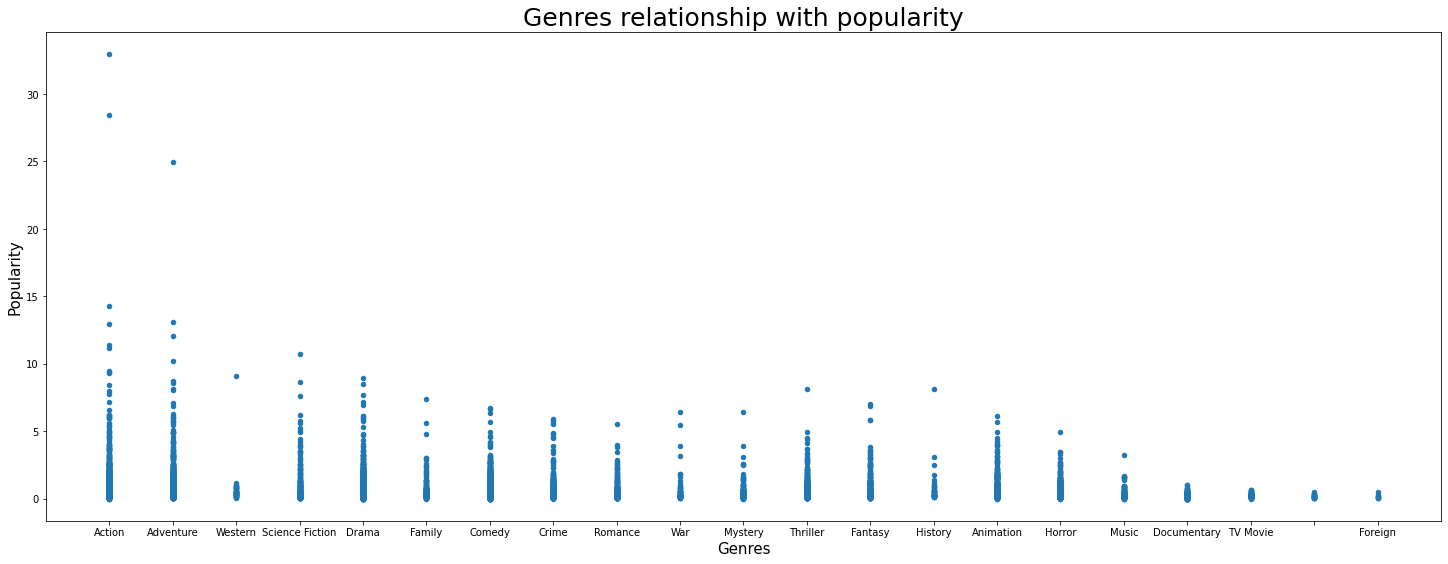

In [322]:
genre.plot(x='genres',y='popularity',kind='scatter', figsize=(25,9))
plt.title('Genres relationship with popularity', fontsize=25)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Popularity', fontsize=15)
plt.show()

##### Genres that are most successful according to popularity this time are Action followed by Adventure

Text(0, 0.5, 'vote Avg.')

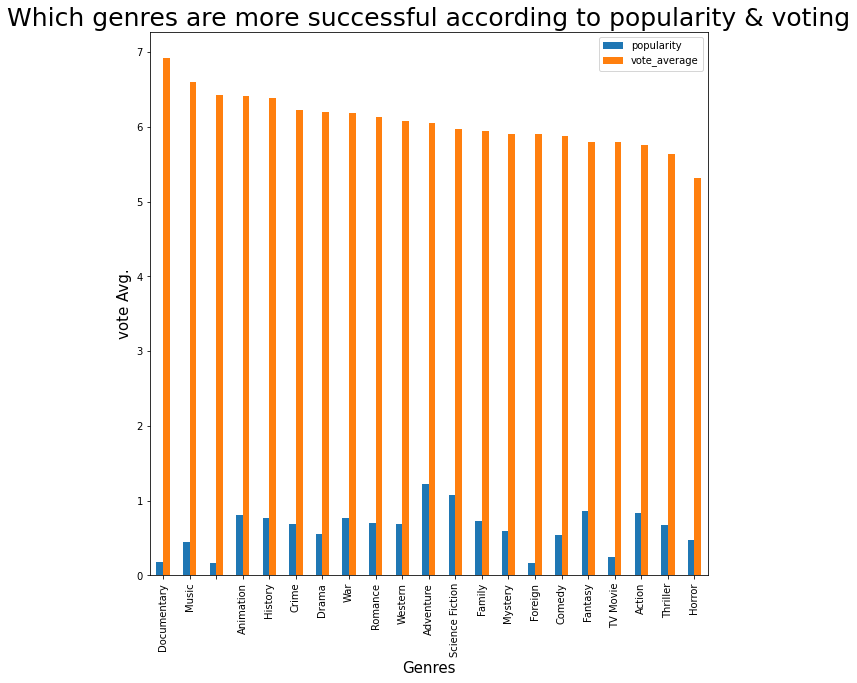

In [330]:
genre[['genres', 'popularity', 'vote_average']].groupby(['genres']).mean().sort_values(["vote_average"], ascending=False).plot(kind="bar", figsize=(10, 10));
plt.title('Which genres are more successful according to popularity & voting', fontsize=25)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('vote Avg.', fontsize=15)

##### Genres that are most successful according to voting this time are Documentary followed by Music

### Research Question 3  (runtime & voting relationship)

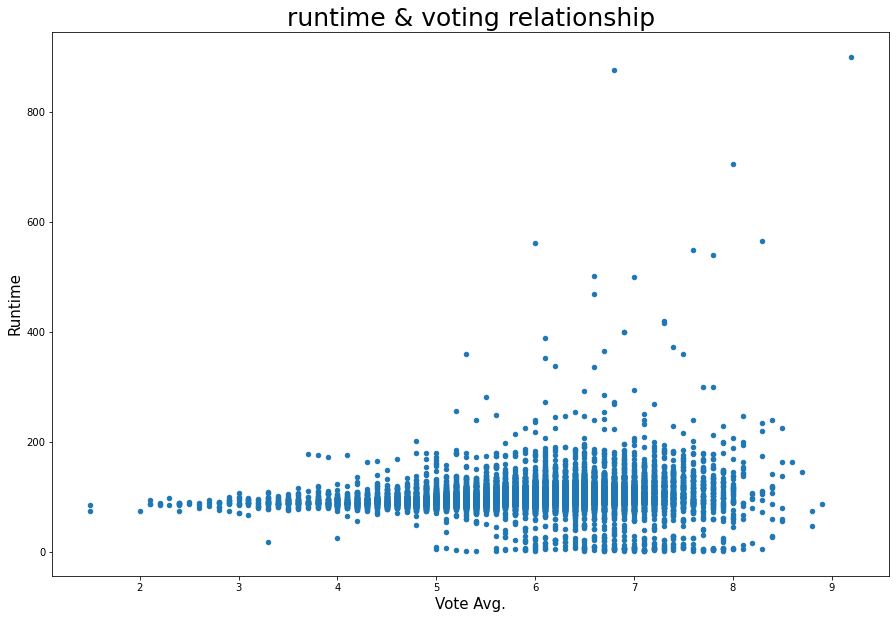

In [324]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#runtime & voting relationship

genre.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10))
plt.title('runtime & voting relationship', fontsize=25)
plt.xlabel('Vote Avg.', fontsize=15)
plt.ylabel('Runtime', fontsize=15);


#### Scatter plot showing that movies with the longest runtime have decent voting ratios

## Runtime histogram representation

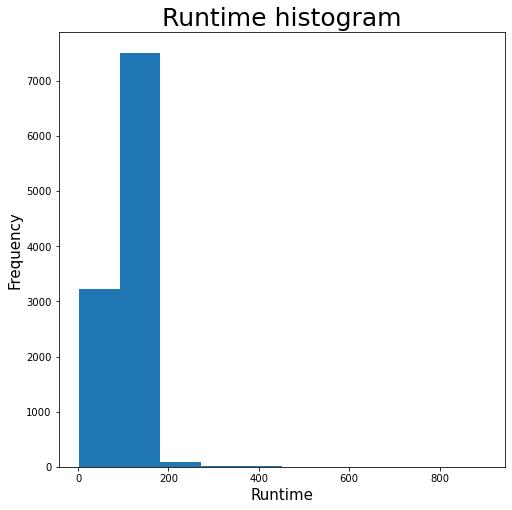

In [325]:
genre['runtime'].plot(kind='hist', figsize=(8, 8));
plt.title('Runtime histogram', fontsize=25)
plt.xlabel('Runtime', fontsize=15);
plt.ylabel('Frequency', fontsize=15);

#### Right skwed histogram

### Research Question 4 (Genres co-relation with Average Budget & Average Revenue)

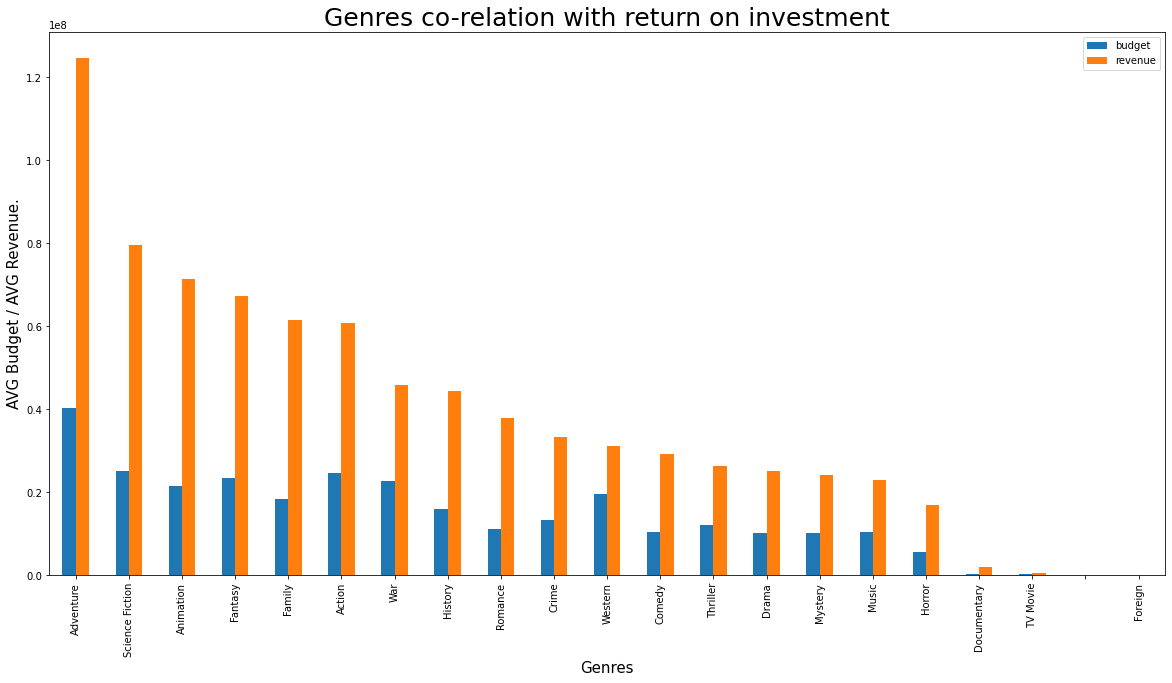

In [329]:

genre[['genres', 'budget', 'revenue']].groupby(['genres']).mean().sort_values(["revenue","budget"], ascending=False).plot(kind="bar", figsize=(20, 10));
plt.title('Genres co-relation with return on investment', fontsize=25)
plt.xlabel('Genres', fontsize=15)
plt.ylabel('AVG Budget / AVG Revenue.', fontsize=15)
plt.show()

#### Return on investment graph, sorted by Genre from highest to lowest

<a id='conclusions'></a>
# Conclusions

> Finally, here we are summarizing the findings and the results that have been performed.


#  For the conclusions, it seems there are more insights to be figured out from the data we have, below is what I can deduce from the data provided and graphs above


## Research Question 1 (Which genres are more successful according to votes)?
#### Conlcusion1: Top 2 most successful genres according to votes are documentary followed by music(which is surprising for me I thought it would have been adventure, action & romance).
>
>


## Research Question 2 (Which genres are more successful according to popularity)?
#### Conclusion2: It seems that top 2 genres which are most popular are Action & Adventure.
>
>


## Research Question 2.b (Which genres are more successful according to popularity & voting)?
#### Conclusion3: After grouping the movies by genres, it seems that the most popular genre is adventure while the highest voting scores is for Documentary. So it does not necessarily mean that the most voted movies are the same as most popular movies
>
>

## Research Question 3  (runtime & voting relationship)
#### Conclusion4: According to the scatter plot of runtime & voting relationship, it seems that movies with the longest runtime have decent voting ratios.
#### Conclusion5: Histogram plot of movies runtime within the given data set is right skwed.
>
>

## Research Question 4 (Genres co-relation with Average Budget & Average Revenue)
#### Conclusion6: Last graph is Genre sorted according to average bugdet and average revenue, and it's showing that movies with the highest budget/revenue are adventure movies while the foreign genre is the lowest. We can conclude also that  the return on investment for Adventure movies is the highest among the genres
>
>

# Limitations and Assumptions
### Limitations can exist due to constraints on analysis design or data, and below factors may impact the findings of  conclusion.
#### Only used the original budget and revenue figures, not the ones after the inflation adjustments
#### Movies with 0 runtime are assumed with mean values
#### Data provided by the dataset was sufficient to answer the questions
#### The judgements and conclusions are directly dependent on the dataset given, and results may change according to the dataset size or numbers within.